In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
# cmd: ipcluster start

In [3]:
import ipyparallel as ipp

In [4]:
rc = ipp.Client()
print('Engines:' + str(rc.ids))
dv = rc[:]

Engines:[0, 1, 2, 3, 4, 5, 6, 7]


In [5]:
def mandel1(x, y, max_iters=1000):
    c = complex(x, y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if z.real*z.real + z.imag*z.imag >= 4:
            return i
    return max_iters

In [6]:
@dv.parallel(block = True)
def mandel2(x, y, max_iters=1000):
    c = complex(x, y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if z.real*z.real + z.imag*z.imag >= 4:
            return i
    return max_iters

In [7]:
x = np.arange(-2, 1, 0.01)
y = np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(x, y)

In [8]:
%%time
im1 = np.reshape(list(map(mandel1, X.ravel(), Y.ravel())), (len(y), len(x)))

Wall time: 4.54 s


In [9]:
%%time
im2 = np.reshape(mandel2.map(X.ravel(), Y.ravel()),  (len(y), len(x)))

Wall time: 1.68 s


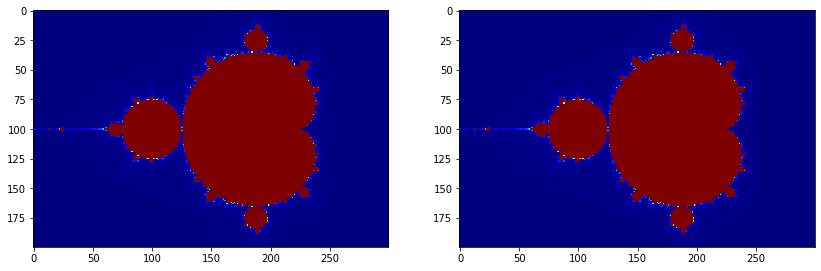

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].grid(False)
axes[0].imshow(im1, cmap='jet')
axes[1].grid(False)
axes[1].imshow(im2, cmap='jet')